In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

import pandas as pd

In [4]:
data = pd.read_csv('./Data after preprocessing no dupl/final_data.csv')

In [6]:
data = data.drop(['Unnamed: 0'], axis=1)

In [8]:
data.shape

(63865, 13)

## Барчарт для сегментов клиентов банка

In [7]:
array_clients_KB = data.groupby(['Клиент_Сегмент_КБ'])['Клиент_Сегмент_КБ'].count().reset_index(name='count')
array_clients_KB

,Клиент_Сегмент_КБ,count
0,0.0,59002
1,1.0,4863


In [9]:
array_clients_MB = data.groupby(['Клиент_Сегмент_МБ'])['Клиент_Сегмент_МБ'].count().reset_index(name='count')
array_clients_MB

,Клиент_Сегмент_МБ,count
0,0.0,55470
1,1.0,8395


In [10]:
array_clients_MKP = data.groupby(['Клиент_Сегмент_МКП'])['Клиент_Сегмент_МКП'].count().reset_index(name='count')
array_clients_MKP

,Клиент_Сегмент_МКП,count
0,0.0,17316
1,1.0,46549


In [11]:
array_clients_SB = data.groupby(['Клиент_Сегмент_СБ'])['Клиент_Сегмент_СБ'].count().reset_index(name='count')
array_clients_SB

,Клиент_Сегмент_СБ,count
0,0.0,59807
1,1.0,4058


In [12]:
array = {'count': [array_clients_KB.iloc[1]['count'], array_clients_MB.iloc[1]['count'], array_clients_MKP.iloc[1]['count'], array_clients_SB.iloc[1]['count']]}
clients1 = pd.DataFrame(array)
clients = clients1['count']

In [13]:
names1 = {'names': ['BB', 'SB', 'MBE', 'MB']}
clients_names = pd.DataFrame(names1)
names = names1['names']

Text(0.5, 0, 'Clients by segments')

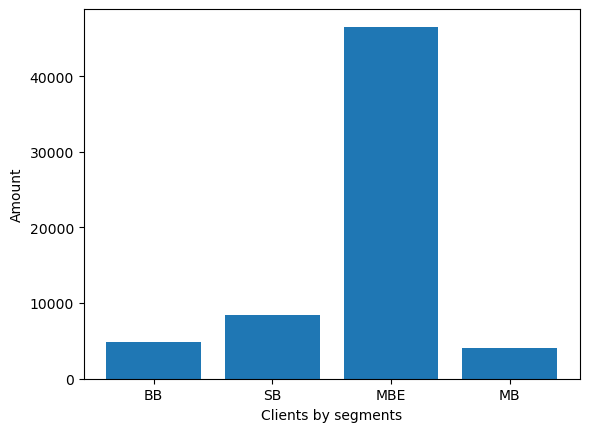

In [14]:
plt.bar(names, clients)
plt.ylabel('Amount')
plt.xlabel('Clients by segments')

In [15]:
salary_Y = data.groupby(['Клиент_НаличиеЗПпроекта_Д'])['Клиент_НаличиеЗПпроекта_Д'].count().reset_index(name='count')
salary_Y

,Клиент_НаличиеЗПпроекта_Д,count
0,0.0,50123
1,1.0,13742


In [16]:
salary_N = data.groupby(['Клиент_НаличиеЗПпроекта_Н'])['Клиент_НаличиеЗПпроекта_Н'].count().reset_index(name='count')
salary_N

,Клиент_НаличиеЗПпроекта_Н,count
0,0.0,13742
1,1.0,50123


In [17]:
array_salary = {'count': [salary_Y.iloc[1]['count'], salary_N.iloc[1]['count']]}
array_salary_dataframe = pd.DataFrame(array_salary)
array_salary_final = array_salary_dataframe['count']

In [18]:
names_salary = {'names': ['Yes', 'No']}
names_salary_dataframe = pd.DataFrame(names_salary)
names_salary_final = names_salary_dataframe['names']

Text(0.5, 0, 'The presence of a salary project')

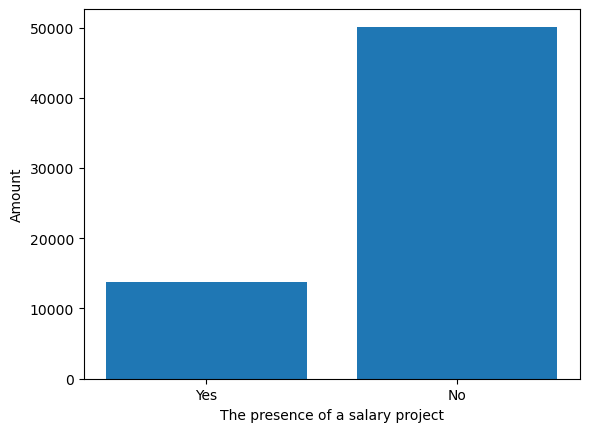

In [19]:
plt.bar(names_salary_final, array_salary_final)
plt.ylabel('Amount')
plt.xlabel('The presence of a salary project')

Divide by year

In [142]:
Year_2018 = final_data[final_data.date_key.str.contains('2018')]
Year_2019 = final_data[final_data.date_key.str.contains('2019')]
Year_2020 = final_data[final_data.date_key.str.contains('2020')]
Year_2021 = final_data[final_data.date_key.str.contains('2021')]

Devide by mounth

Year 2018

In [143]:
Year_2018_P1 = Year_2018[Year_2018.date_key < '2018-08-01']
Year_2018_P1.head()

,date_key,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
38,2018-03-01,13500.00,129.0,1910650.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
39,2018-03-01,8.00,129.0,119556.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40,2018-03-01,4000.00,129.0,496375.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41,2018-03-01,1453597.61,129.0,569265.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42,2018-03-01,690.00,129.0,1382934.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [144]:
Year_2018_P1.shape[0]

8596454

In [145]:
Year_2018_P1_count = Year_2018_P1.groupby(['Fraud_presence'])['Fraud_presence'].count().reset_index(name='count')
Year_2018_P1_count

,Fraud_presence,count
0,0.0,8396443
1,1.0,200011


In [146]:
Year_2018_P1 = Year_2018_P1.drop(Year_2018_P1.query('Fraud_presence == 0').sample(n = 8192514).index)
Year_2018_P1.head()

,date_key,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
117,2018-03-02,13338.43,129.0,443412.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
123,2018-03-02,54080.00,129.0,302746.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
175,2018-03-02,150000.00,129.0,320928.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
210,2018-03-05,530339.16,129.0,301050.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
280,2018-03-05,3000.00,129.0,647677.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [147]:
Year_2018_P1.shape[0]

403940

In [148]:
Year_2018_P1_count = Year_2018_P1.groupby(['Fraud_presence'])['Fraud_presence'].count().reset_index(name='count')
Year_2018_P1_count

,Fraud_presence,count
0,0.0,203929
1,1.0,200011


----

In [149]:
Year_2018_P2 = Year_2018[Year_2018.date_key >= '2018-08-01']
Year_2018_P2.head()

,date_key,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
9557,2018-08-01,4.00,129.0,119556.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9558,2018-08-01,5600.00,129.0,1805262.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9559,2018-08-01,148007.51,129.0,331032.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9560,2018-08-01,30339.45,129.0,459242.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9561,2018-08-01,5876.40,129.0,552104.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [150]:
Year_2018_P2.shape[0]

9464241

In [151]:
Year_2018_P2_count = Year_2018_P2.groupby(['Fraud_presence'])['Fraud_presence'].count().reset_index(name='count')
Year_2018_P2_count

,Fraud_presence,count
0,0.0,9233881
1,1.0,230360


In [152]:
Year_2018_P2 = Year_2018_P2.drop(Year_2018_P2.query('Fraud_presence == 0').sample(n = 9000104).index)
Year_2018_P2.head()

,date_key,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
9562,2018-08-01,64400.00,129.0,880720.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9576,2018-08-01,6050.00,129.0,802616.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9591,2018-08-01,7580.00,129.0,216600.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9647,2018-08-02,26849.53,129.0,119556.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9687,2018-08-03,82216.44,129.0,357698.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [153]:
Year_2018_P2.shape[0]

464137

In [154]:
Year_2018_P2_count = Year_2018_P2.groupby(['Fraud_presence'])['Fraud_presence'].count().reset_index(name='count')
Year_2018_P2_count

,Fraud_presence,count
0,0.0,233777
1,1.0,230360


----
----

Year 2019

In [155]:
Year_2019_P1 = Year_2019[Year_2019.date_key < '2019-06-01']
Year_2019_P1.head()

,date_key,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
16873,2019-01-09,14000.00,129.0,1719319.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16874,2019-01-09,49893.47,129.0,198880.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16875,2019-01-09,400.00,129.0,802616.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16876,2019-01-09,1040.00,129.0,1659481.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16877,2019-01-09,6000.22,129.0,464864.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [156]:
Year_2019_P1.shape[0]

8335785

In [157]:
Year_2019_P1_count = Year_2019_P1.groupby(['Fraud_presence'])['Fraud_presence'].count().reset_index(name='count')
Year_2019_P1_count

,Fraud_presence,count
0,0.0,8200812
1,1.0,134973


In [158]:
Year_2019_P1 = Year_2019_P1.drop(Year_2019_P1.query('Fraud_presence == 0').sample(n = 8062634).index)
Year_2019_P1.head()

,date_key,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
16920,2019-01-09,72000.0,129.0,1719319.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16922,2019-01-09,76650.0,129.0,1719319.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16950,2019-01-09,1000.0,129.0,802616.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16980,2019-01-10,138705.0,129.0,1719319.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17065,2019-01-14,50800.0,129.0,678882.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [159]:
Year_2019_P1.shape[0]

273151

In [160]:
Year_2019_P1_count = Year_2019_P1.groupby(['Fraud_presence'])['Fraud_presence'].count().reset_index(name='count')
Year_2019_P1_count

,Fraud_presence,count
0,0.0,138178
1,1.0,134973


----

In [161]:
Year_2019_P2 = Year_2019[Year_2019.date_key >= '2019-06-01']
Year_2019_P2.head()

,date_key,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
22297,2019-06-02,2910.0,129.0,119556.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22298,2019-06-03,880.0,129.0,647677.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22299,2019-06-03,6504.0,129.0,1448163.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22300,2019-06-03,2700.0,129.0,876594.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22301,2019-06-03,7993.0,129.0,500094.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [162]:
Year_2019_P2.shape[0]

13631721

In [163]:
Year_2019_P2_count = Year_2019_P2.groupby(['Fraud_presence'])['Fraud_presence'].count().reset_index(name='count')
Year_2019_P2_count

,Fraud_presence,count
0,0.0,13454236
1,1.0,177485


In [164]:
Year_2019_P2 = Year_2019_P2.drop(Year_2019_P2.query('Fraud_presence == 0').sample(n = 13271668).index)
Year_2019_P2.head()

,date_key,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
22374,2019-06-03,90000.00,129.0,298988.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22413,2019-06-04,750.00,129.0,802616.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22475,2019-06-06,13913364.96,129.0,1713941.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22521,2019-06-07,10221.79,129.0,464864.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22573,2019-06-07,6844.30,129.0,464864.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [165]:
Year_2019_P2.shape[0]

360053

In [166]:
Year_2019_P2_count = Year_2019_P2.groupby(['Fraud_presence'])['Fraud_presence'].count().reset_index(name='count')
Year_2019_P2_count

,Fraud_presence,count
0,0.0,182568
1,1.0,177485


---
---

Year 2020

In [167]:
Year_2020_P1 = Year_2020[Year_2020.date_key < '2020-06-01']
Year_2020_P1.head()

,date_key,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
28947,2020-01-09,56000.00,129.0,1361832.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28948,2020-01-09,343264.66,129.0,302746.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28949,2020-01-09,2483.20,129.0,496375.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28950,2020-01-09,67643.26,129.0,526597.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28951,2020-01-09,23120.00,129.0,495913.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [168]:
Year_2020_P1.shape[0]

7895128

In [169]:
Year_2020_P1_count = Year_2020_P1.groupby(['Fraud_presence'])['Fraud_presence'].count().reset_index(name='count')
Year_2020_P1_count

,Fraud_presence,count
0,0.0,7807731
1,1.0,87397


In [170]:
Year_2020_P1 = Year_2020_P1.drop(Year_2020_P1.query('Fraud_presence == 0').sample(n = 7717665).index)
Year_2020_P1.head()

,date_key,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
29055,2020-01-13,92439.00,129.0,666239.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29060,2020-01-13,3500.00,129.0,647677.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29132,2020-01-16,1809.12,129.0,1423769.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29193,2020-01-17,21410.14,129.0,119556.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29220,2020-01-20,21675.00,129.0,573585.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [171]:
Year_2020_P1.shape[0]

177463

In [172]:
Year_2020_P1_count = Year_2020_P1.groupby(['Fraud_presence'])['Fraud_presence'].count().reset_index(name='count')
Year_2020_P1_count

,Fraud_presence,count
0,0.0,90066
1,1.0,87397


---

In [173]:
Year_2020_P2 = Year_2020[Year_2020.date_key >= '2020-06-01']
Year_2020_P2.head()

,date_key,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
33279,2020-06-01,45740.00,129.0,526597.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33280,2020-06-01,13230.00,129.0,464864.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33281,2020-06-01,14800.44,129.0,129.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33282,2020-06-01,353242.00,129.0,587927.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33283,2020-06-01,1282002.87,129.0,1365526.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [174]:
Year_2020_P2.shape[0]

13094783

In [175]:
Year_2020_P2_count = Year_2020_P2.groupby(['Fraud_presence'])['Fraud_presence'].count().reset_index(name='count')
Year_2020_P2_count

,Fraud_presence,count
0,0.0,12986729
1,1.0,108054


In [176]:
Year_2020_P2 = Year_2020_P2.drop(Year_2020_P2.query('Fraud_presence == 0').sample(n = 12875534).index)
Year_2020_P2.head()

,date_key,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
33341,2020-06-02,433825.0,129.0,230103.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33454,2020-06-04,4350.0,129.0,285123.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33537,2020-06-09,550545.0,129.0,1389940.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33630,2020-06-11,10957.0,129.0,464864.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33660,2020-06-11,112510.3,129.0,1454617.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [177]:
Year_2020_P2.shape[0]

219249

In [178]:
Year_2020_P2_count = Year_2020_P2.groupby(['Fraud_presence'])['Fraud_presence'].count().reset_index(name='count')
Year_2020_P2_count

,Fraud_presence,count
0,0.0,111195
1,1.0,108054


---
---

Year 2021

In [179]:
Year_2021.head()

,date_key,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
41593,2021-01-01,59.00,129.0,119556.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41594,2021-01-11,93712.00,129.0,1322063.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41595,2021-01-11,11400.00,129.0,464864.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41596,2021-01-11,9163.52,129.0,464864.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41597,2021-01-11,10374.90,129.0,464864.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [180]:
Year_2021.shape[0]

2962694

In [181]:
Year_2021_count = Year_2021.groupby(['Fraud_presence'])['Fraud_presence'].count().reset_index(name='count')
Year_2021_count

,Fraud_presence,count
0,0.0,2948475
1,1.0,14219


In [182]:
Year_2021 = Year_2021.drop(Year_2021.query('Fraud_presence == 0').sample(n = 2933531).index)
Year_2021.head()

,date_key,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
41659,2021-01-12,20970.0,129.0,1036317.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41731,2021-01-13,12800.0,129.0,379614.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41993,2021-01-20,9000000.0,129.0,129.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42290,2021-01-28,15000.0,129.0,587548.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42562,2021-02-03,8827.1,129.0,3021.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [183]:
Year_2021.shape[0]

29163

In [184]:
Year_2021_count = Year_2021.groupby(['Fraud_presence'])['Fraud_presence'].count().reset_index(name='count')
Year_2021_count

,Fraud_presence,count
0,0.0,14944
1,1.0,14219


---
---

Random Forest

In [185]:
from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [186]:
rf = RandomForestClassifier(random_state = 1, n_jobs=-1)

In [187]:
param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'n_estimators': [10,20,30,40,50,60,70,80,90,100]
}

Для 6/1

In [188]:
train6 = pd.concat([Year_2018_P1, Year_2018_P2, Year_2019_P1, Year_2019_P2, Year_2020_P1, Year_2020_P2], ignore_index=True)
train6 = train6.drop(['date_key'], axis=1)
train_data6 = train6.drop(['Fraud_presence', 'Reject_presence'], axis=1)
train_labels6 = train6['Fraud_presence']
test_data6 = Year_2021.drop(['Fraud_presence', 'Reject_presence', 'date_key'], axis=1)
test_labels6 = Year_2021['Fraud_presence']

In [189]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)
CV_rfc.fit(train_data6, train_labels6)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [190]:
CV_rfc.best_params_

{'max_depth': 10, 'n_estimators': 70}

In [191]:
rf_best_param=RandomForestClassifier(random_state = 1, max_depth=10, n_estimators=60, n_jobs=-1)

In [192]:
rf_best_param.fit(train_data6, train_labels6)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [193]:
predictions_rf6 = rf_best_param.predict(test_data6)
predictions_rf6

array([0., 0., 0., ..., 0., 0., 0.])

In [194]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, roc_auc_score, roc_curve
print("Precision:", precision_score(test_labels6, predictions_rf6))
print("Recall: ", recall_score(test_labels6, predictions_rf6))
print("Accuracy: ", accuracy_score(test_labels6, predictions_rf6))
print("F1-score: ", f1_score(test_labels6, predictions_rf6))
print("Log_loss: ", log_loss(test_labels6, predictions_rf6))

Precision: 0.8827586206896552
Recall:  0.9902243477037767
Accuracy:  0.931111339711278
F1-score:  0.9334084656435413
Log_loss:  2.37938130592086


In [195]:
predict_proba_rf6 = rf_best_param.predict_proba(test_data6)
predict_proba_rf6

array([[9.99310760e-01, 6.89239965e-04],
       [9.99310760e-01, 6.89239965e-04],
       [9.99536109e-01, 4.63890554e-04],
       ...,
       [8.45154278e-01, 1.54845722e-01],
       [8.93275068e-01, 1.06724932e-01],
       [9.99358255e-01, 6.41744548e-04]])

In [196]:
predict_proba_rf6 = predict_proba_rf6[:, 1]

In [197]:
print("AUC: ", roc_auc_score (test_labels6, predict_proba_rf6))

AUC:  0.9856490416508478


[-0.1, 1.1, -0.1, 1.1]

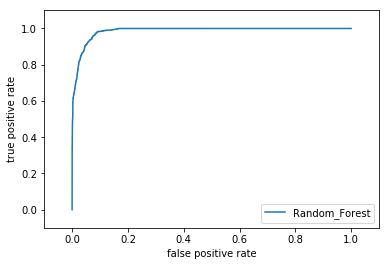

In [198]:
aucs = ""
fpr, tpr, thr = roc_curve(test_labels6, predict_proba_rf6)
plt.plot(fpr, tpr, label="Random_Forest")
aucs += "Random_Forest" + ":%3f"%roc_auc_score(test_labels6, predict_proba_rf6) + "\n"
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])

---
---

XGBoost

In [199]:
from xgboost import XGBClassifier
from sklearn.model_selection import  learning_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.model_selection import GridSearchCV

In [227]:
train7 = pd.concat([Year_2018_P1, Year_2018_P2, Year_2019_P1, Year_2019_P2, Year_2020_P1, Year_2020_P2], ignore_index=True)
train7 = train7.drop(['date_key'], axis=1)
train_data7 = train7.drop(['Fraud_presence', 'Reject_presence'], axis=1)
train_labels7 = train7['Fraud_presence']
test_data7 = Year_2021.drop(['Fraud_presence', 'Reject_presence', 'date_key'], axis=1)
test_labels7 = Year_2021['Fraud_presence']

In [243]:
test_data7.head()

,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н
41659,20970.0,129.0,1036317.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0
41731,12800.0,129.0,379614.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0
41993,9000000.0,129.0,129.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0
42290,15000.0,129.0,587548.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0
42562,8827.1,129.0,3021.0,44,5479,1.0,0.0,0.0,0.0,1.0,0.0


In [244]:
test_data7.dtypes

amount                       float64
client_inn                   float64
partner_inn                  float64
years                         object
Длина_Отн_в_днях              object
Клиент_Сегмент_КБ            float64
Клиент_Сегмент_МБ            float64
Клиент_Сегмент_МКП           float64
Клиент_Сегмент_СБ            float64
Клиент_НаличиеЗПпроекта_Д    float64
Клиент_НаличиеЗПпроекта_Н    float64
dtype: object

In [245]:
test_data7['years']=test_data7['years'].astype(int)
test_data7['Длина_Отн_в_днях']=test_data7['Длина_Отн_в_днях'].astype(int)

In [233]:
param_grid = {
    "learning_rate": [0.001, 0.01, 0.1, 1],
    'n_estimators': [100, 200, 300, 400]
}

In [234]:
xgbc = XGBClassifier(n_jobs=-1)

In [235]:
CV_xgb = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv=3, n_jobs=-1)
CV_xgb.fit(train_data7, train_labels7)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400], 'learning_rate': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [236]:
CV_xgb.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [237]:
xgb_best_param=XGBClassifier(learning_rate=1, n_estimators=200, n_jobs=-1)

In [238]:
xgb_best_param.fit(train_data7, train_labels7)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [246]:
predictions_xgb = xgb_best_param.predict(test_data7)

In [247]:
print("Precision:", precision_score(test_labels7, predictions_xgb))
print("Recall: ", recall_score(test_labels7, predictions_xgb))
print("Accuracy: ", accuracy_score(test_labels7, predictions_xgb))
print("F1-score: ", f1_score(test_labels7, predictions_xgb))
print("Log_loss: ", log_loss(test_labels7, predictions_xgb))

Precision: 0.9335192933519293
Recall:  0.9885364652929179
Accuracy:  0.9600864108630799
F1-score:  0.9602404700095641
Log_loss:  1.3785939759525319


In [248]:
predict_proba_xgb7 = xgb_best_param.predict_proba(test_data7)
predict_proba_xgb7

array([[1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 1.6778992e-10],
       [9.9262846e-01, 7.3715495e-03],
       [1.0000000e+00, 4.3450388e-14]], dtype=float32)

In [250]:
predict_proba_xgb7 = predict_proba_xgb7[:, 1]

In [251]:
print("AUC: ", roc_auc_score (test_labels7, predict_proba_xgb7))

AUC:  0.9857327566765703


[-0.1, 1.1, -0.1, 1.1]

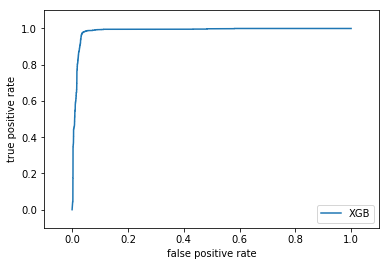

In [253]:
aucs = ""
fpr, tpr, thr = roc_curve(test_labels7, predict_proba_xgb7)
plt.plot(fpr, tpr, label="XGB")
aucs += "XGB" + ":%3f"%roc_auc_score(test_labels7, predict_proba_xgb7) + "\n"
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)
plt.axis([-0.1, 1.1, -0.1, 1.1])